# Assignment 2
### Understanding Uncertainty
### Due 9/12

# Name:
# Shawn Ding

1. 'State Bottle Retail' is the price at which the bottle is sold, while 'State Bottle Cost' is the price the state pays for a bottle.
- How do you define the most profitable item? Why? Explain your thinking.
- Use `.groupby` calculations to determine the most profitable liquors sold in Iowa.
- Make a plot of the top liquors.

In [1]:
import urllib.request
import os

def download_data(force=False):
    """Download and extract course data from Zenodo."""
    import urllib.request
    import zipfile
    import os
    
    zip_path = 'data.zip'
    data_dir = 'data'
    
    if not os.path.exists(zip_path) or force:
        print("Downloading course data...")
        urllib.request.urlretrieve(
            'https://zenodo.org/records/16954427/files/data.zip?download=1',
            zip_path
        )
        print("Download complete")
    
    if not os.path.exists(data_dir):
        print("Extracting data files...")
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(data_dir)
        print("Data extracted")
    
    return data_dir

download_data()

'data'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
idf = pd.read_csv('./data/iowa.csv')
idf.head()

,Invoice/Item Number,Date,Store Number,Store Name,Zip Code,Category Name,Vendor Name,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars)
0,INV-59108400026,06/06/2023,3723,J D SPIRITS LIQUOR,51040,STRAIGHT RYE WHISKIES,INFINIUM SPIRITS,27102,TEMPLETON RYE 4YR,750,18.09,27.14,2,54.28
1,S16879800057,01/16/2014,3926,LIQUOR DOWNTOWN / IOWA CITY,52240,VODKA 80 PROOF,HEAVEN HILL BRANDS,35416,BURNETT'S VODKA 80 PRF,750,4.84,7.26,12,87.12
2,INV-05301100019,06/05/2017,3829,GARY'S FOODS / MT VERNON,52314,CANADIAN WHISKIES,DIAGEO AMERICAS,11296,CROWN ROYAL,750,15.59,23.39,6,135.66
3,INV-40973500083,10/14/2021,5102,WILKIE LIQUORS,52314,AMERICAN SCHNAPPS,JIM BEAM BRANDS,82787,DEKUYPER BUTTERSHOTS,1000,7.87,11.81,12,141.72
4,INV-17022500013,01/18/2019,2560,HY-VEE FOOD STORE / MARION,52302,WHISKEY LIQUEUR,SAZERAC COMPANY INC,64863,FIREBALL CINNAMON WHISKEY,200,2.50,3.75,12,45.00


In [4]:
idf["Profit_per_Bottle"]=idf["State Bottle Retail"]-idf["State Bottle Cost"]
idf["Total_Profit"]=idf["Profit_per_Bottle"]*idf["Bottles Sold"]
profit_summary = idf.groupby("Item Description")["Total_Profit"].sum().sort_values(ascending=False)

Most profitable item: TITOS HANDMADE VODKA
Profit amount: 364074.35000000003


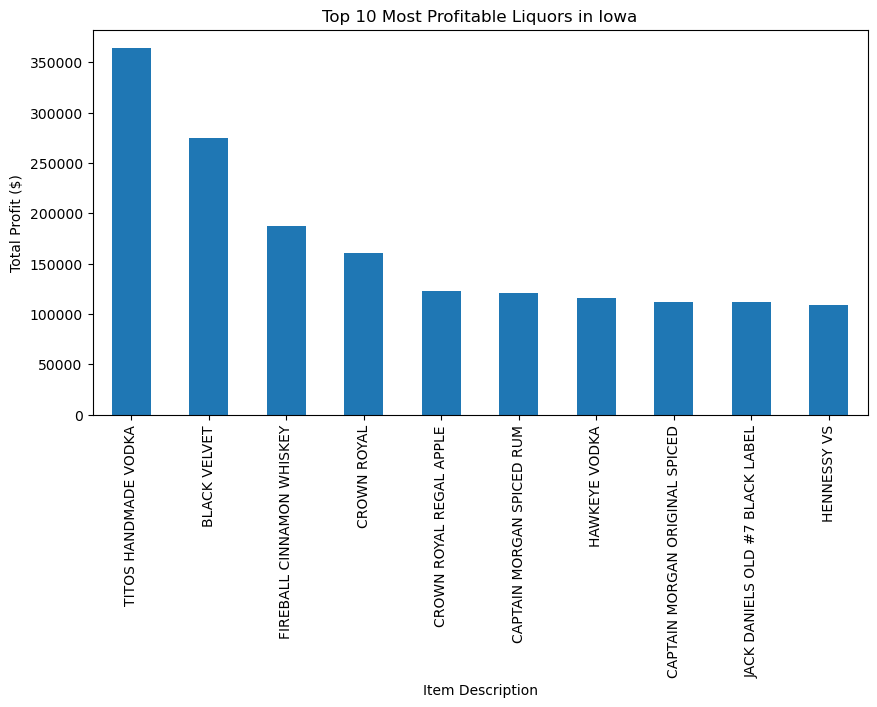

In [5]:
print("Most profitable item:", profit_summary.idxmax())
print("Profit amount:", profit_summary.max())

profit_summary.head(10).plot(kind="bar", figsize=(10,5))
plt.title("Top 10 Most Profitable Liquors in Iowa")
plt.ylabel("Total Profit ($)")
plt.show()

2. This question is to further explore broadcasting in NumPy.

- In the first code chunk below, there are two vectors, $x$ and $y$. What happens when you try to subtract them?
- Instead, try `x.reshape(-1,1)-y.reshape(1,-1)`. What do you get?
- Try `x.reshape(1,-1)-y.reshape(-1,1)`. Compare the results to your previous answer.
- Write two double for-loops to replicate the results of the previous two answers. 
- Clearly explain how `x.reshape(1,-1)` and `x.reshape(-1,1)` change $x$

In [6]:
import numpy as np

x = np.array([1,3,5])
y = np.array([2,5])

In [7]:
try:
    print(x - y)
except ValueError as e:
    print("Error:", e)

print("x.reshape(-1,1) - y.reshape(1,-1):\n", x.reshape(-1,1)-y.reshape(1,-1))
print("x.reshape(1,-1) - y.reshape(-1,1):\n", x.reshape(1,-1)-y.reshape(-1,1))

res1 = np.zeros((len(x), len(y)))
res2 = np.zeros((len(y), len(x)))

for i in range(len(x)):
    for j in range(len(y)):
        res1[i,j] = x[i] - y[j]

for i in range(len(y)):
    for j in range(len(x)):
        res2[i,j] = x[j] - y[i]

print("Loop result 1:\n", res1)
print("Loop result 2:\n", res2)

Error: operands could not be broadcast together with shapes (3,) (2,) 
x.reshape(-1,1) - y.reshape(1,-1):
 [[-1 -4]
 [ 1 -2]
 [ 3  0]]
x.reshape(1,-1) - y.reshape(-1,1):
 [[-1  1  3]
 [-4 -2  0]]
Loop result 1:
 [[-1. -4.]
 [ 1. -2.]
 [ 3.  0.]]
Loop result 2:
 [[-1.  1.  3.]
 [-4. -2.  0.]]


3. The indicator function $\mathbb{I}\{ x \le z \}$ takes the value 0 if $x>z$ and 1 if $x \le z$ is true, or
$$
\mathbb{I}\{x \le z\} = \begin{cases}
0, &x > z \\
1, &x \le z
\end{cases}
$$

- For $x = 3$, plot the indicator function for any $z$
- Explain how $ 1- \mathbb{I}\{ x \le z \} = \mathbb{I}\{ x > z \}$. Drawing a plot might help, or looking at the definition given above.
- The code below generates a random sample for different numbers of observations, $N = 3, 30, 300, 3000 $. Write a function to compute the ECDF curve for each sample, and plot your results.
- Describe in your own words what happens to the ECDF qualitatively as the sample size $N$ increases

In [8]:
import numpy as np
import seaborn as sns

rng = np.random.default_rng(100)

for N in (3,30,300,3000):
    X = rng.normal(0,1,N)
    # ECDF plot goes here:


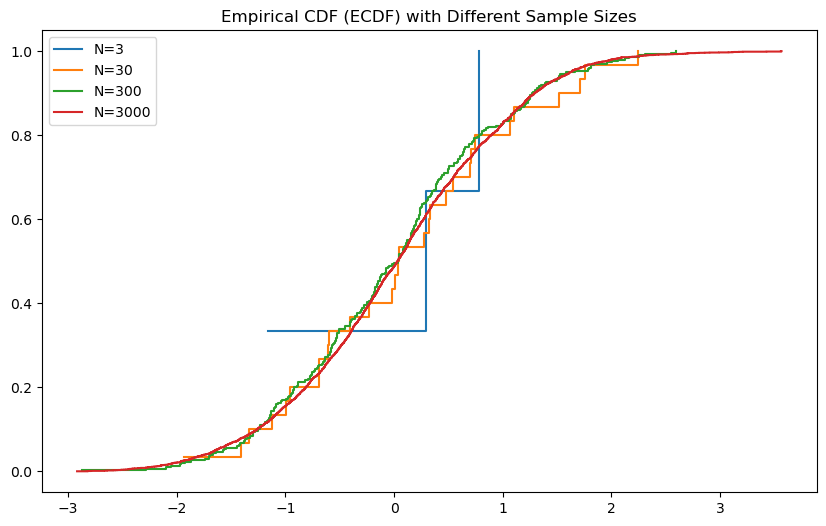

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def indicator(x, z):
    return 1 if x <= z else 0

def ecdf(data):
    x = np.sort(data)
    y = np.arange(1, len(x)+1) / len(x)
    return x, y

rng = np.random.default_rng(100)

plt.figure(figsize=(10,6))
for N in (3,30,300,3000):
    X = rng.normal(0,1,N)
    x, y = ecdf(X)
    plt.step(x, y, where="post", label=f"N={N}")

plt.title("Empirical CDF (ECDF) with Different Sample Sizes")
plt.legend()
plt.show()


4. A **quantile** generalizes the concept of the median so that instead of 50% of the mass below and 50% above, the $q$-quantile is the value for which $q$ proportion of the data are below that value and $(1-q)$ proportion of the data are above that value. This is a concept of **order**.

- Write a function that computes any quantile without using Numpy's `np.quantile`
- Write a function that computes the **Interquartile Range (IQR)** -- the .25 quantile and the .75 quantile, which brackets 50% of the data -- and the **whiskers**: $\pm 1.5 \times \text{IQR}$ from the edges of the IQR
- Write a function that computes a five-number summary and values for a boxplot: the minimum, the .25 quantile, the median, the .75 quantile, and the maximum, and the whiskers
- Anything outside the whiskers is an **outlier**; write a function that returns a Boolean vector indicating if the observations are outliers.
- For a numeric variable of your choice from one of the datasets, apply your functions from above, and compare your answers with `sns.boxplot` and `df.describe`. 

In [10]:
import numpy as np

def my_quantile(data, q):
    data_sorted = np.sort(data)
    pos = q*(len(data_sorted)-1)
    lower, upper = int(np.floor(pos)), int(np.ceil(pos))
    return (data_sorted[lower] + data_sorted[upper]) / 2

def IQR(data):
    q25, q75 = my_quantile(data, 0.25), my_quantile(data, 0.75)
    return q25, q75, q75-q25

def five_number_summary(data):
    return {
        "min": np.min(data),
        "Q1": my_quantile(data, 0.25),
        "median": my_quantile(data, 0.5),
        "Q3": my_quantile(data, 0.75),
        "max": np.max(data)
    }

def find_outliers(data):
    q25, q75, iqr = IQR(data)
    lower, upper = q25 - 1.5*iqr, q75 + 1.5*iqr
    return (data < lower) | (data > upper)



5. The kernel density estimator captures the concentration of the data around various points, and is defined as
$$
\hat{f}_{N,h}(z) = \frac{1}{N} \sum_{i=1}^N \frac{1}{h} k \left( \frac{x_i - z}{h}\right)
$$
where $h$ is the bandwidth and $k()$ is one of the kernel functions from the class materials (Gaussian, Epanechnikov, uniform, triangular).

- Write a function that takes the bandwidth $h$ as given, and computes and plots $\hat{f}_{N,h}(z)$, for the kernels listed in the slides
- Write a function that computes the plug-in bandwidth
- Use your functions to analyze some numeric variables from a dataset of your choice, using a variety of bandwidths
- Compare bandwidths that are greater or less than the plug-in value with the results for the plug-in value. When does the KDE appear to be overfitting? Underfitting?